In [1]:
import random

import networkx as nx
import numpy as np
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

# from tspqaoa.optimization import get_optimized_angles
# from tspqaoa.qaoa import get_tsp_qaoa_circuit


In [2]:
from all_utils_trial import *

In [5]:
# build graph
G = nx.complete_graph(4)
for (u,v,w) in G.edges(data=True):
    w['weight'] = random.random()

pen = G.number_of_nodes()*10

x0 = np.ones(2) # p is inferred from len(x0)
# x = get_optimized_angles(G, x0, pen)

In [3]:
best_params = [1.9378, 1.9814752]

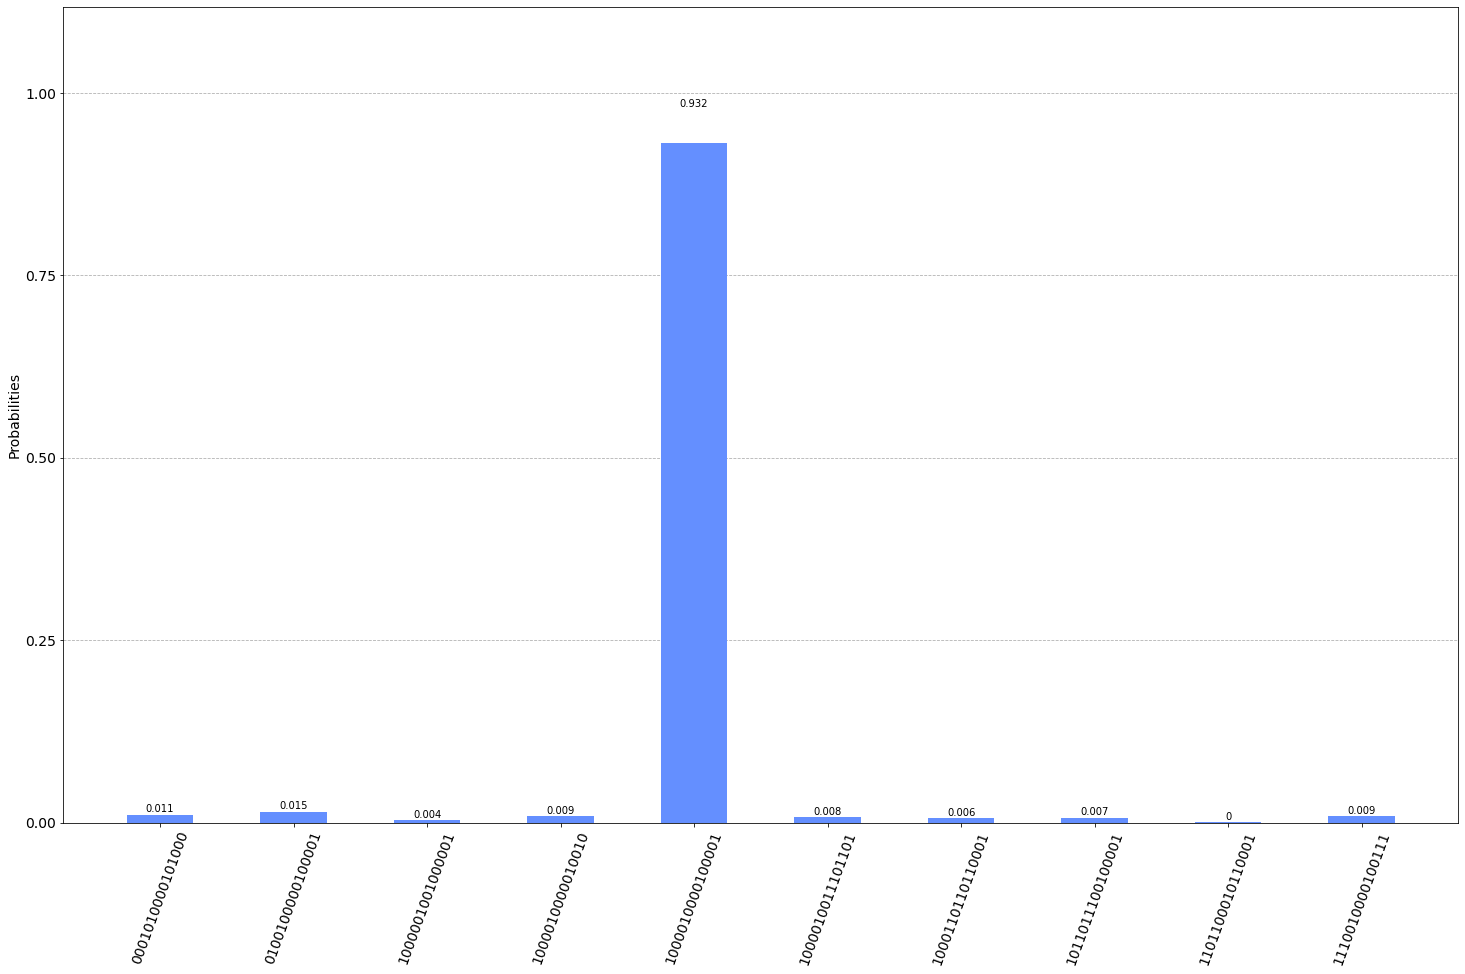

In [6]:
# x = x['x']
x = best_params
p=len(x)
beta = x[0:int(p/2)]
gamma = x[int(p/2):p]
qc = get_tsp_qaoa_circuit(G, beta, gamma, pen=5, T1=1, T2=1)
qc.measure_all()
backend = AerSimulator()
plot_histogram(backend.run(qc).result().get_counts(), figsize=(25,15))

In [10]:
count = backend.run(qc).result().get_counts()
compute_tsp_cost_expectation(count, G, pen)

100%|██████████| 11/11 [00:00<00:00, 12837.32it/s]


3.5638876617730273

In [15]:
[(s, count[s], get_tsp_cost(s,G,pen)) for s in count.keys() if is_valid_path(s, 4)]

[('0100100000100001', 6, 2.1135653676200454),
 ('1000010000010010', 9, 1.6888746329357716),
 ('0001001001001000', 1, 1.7215029564770175),
 ('0001010000101000', 14, 1.7772748466035966),
 ('1000001001000001', 8, 2.2019655812878702),
 ('1000010000100001', 948, 2.1701694370192057)]